ROOT Keys: ['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandbsbase;1', 'DF_2387899194678550/O2hfmlbs;1', 'DF_2387899194678550/O2hfredbsdsml;1', 'DF_2387899194678550/O2hfredbsprong;1', 'DF_2387899194678550/O2hfredcandbslite;1', 'DF_2387899194678550/O2hfselbs;1', 'parentFiles;1']
Reading DF_2387899194678550/O2hfcandbsbase;1

Table: O2hfcandbsbase
Number of entries: 30
Columns: ['fIndexCollisions', 'fPosX', 'fPosY', 'fPosZ', 'fXSecondaryVertex', 'fYSecondaryVertex', 'fZSecondaryVertex', 'fErrorDecayLength', 'fErrorDecayLengthXY', 'fChi2PCA', 'fPxProng0', 'fPyProng0', 'fPzProng0', 'fPxProng1', 'fPyProng1', 'fPzProng1', 'fImpactParameter0', 'fImpactParameter1', 'fErrorImpactParameter0', 'fErrorImpactParameter1']
Plotting fIndexCollisions
Plotting fPosX
Plotting fPosY
Plotting fPosZ
Plotting fXSecondaryVertex
Plotting fYSecondaryVertex
Plotting fZSecondaryVertex
Plotting fErrorDecayLength
Plotting fErrorDecayLengthXY
Plotting fChi2PCA
Plotting fPxProng0
Plotting fPyProng0
Plotting fPzP

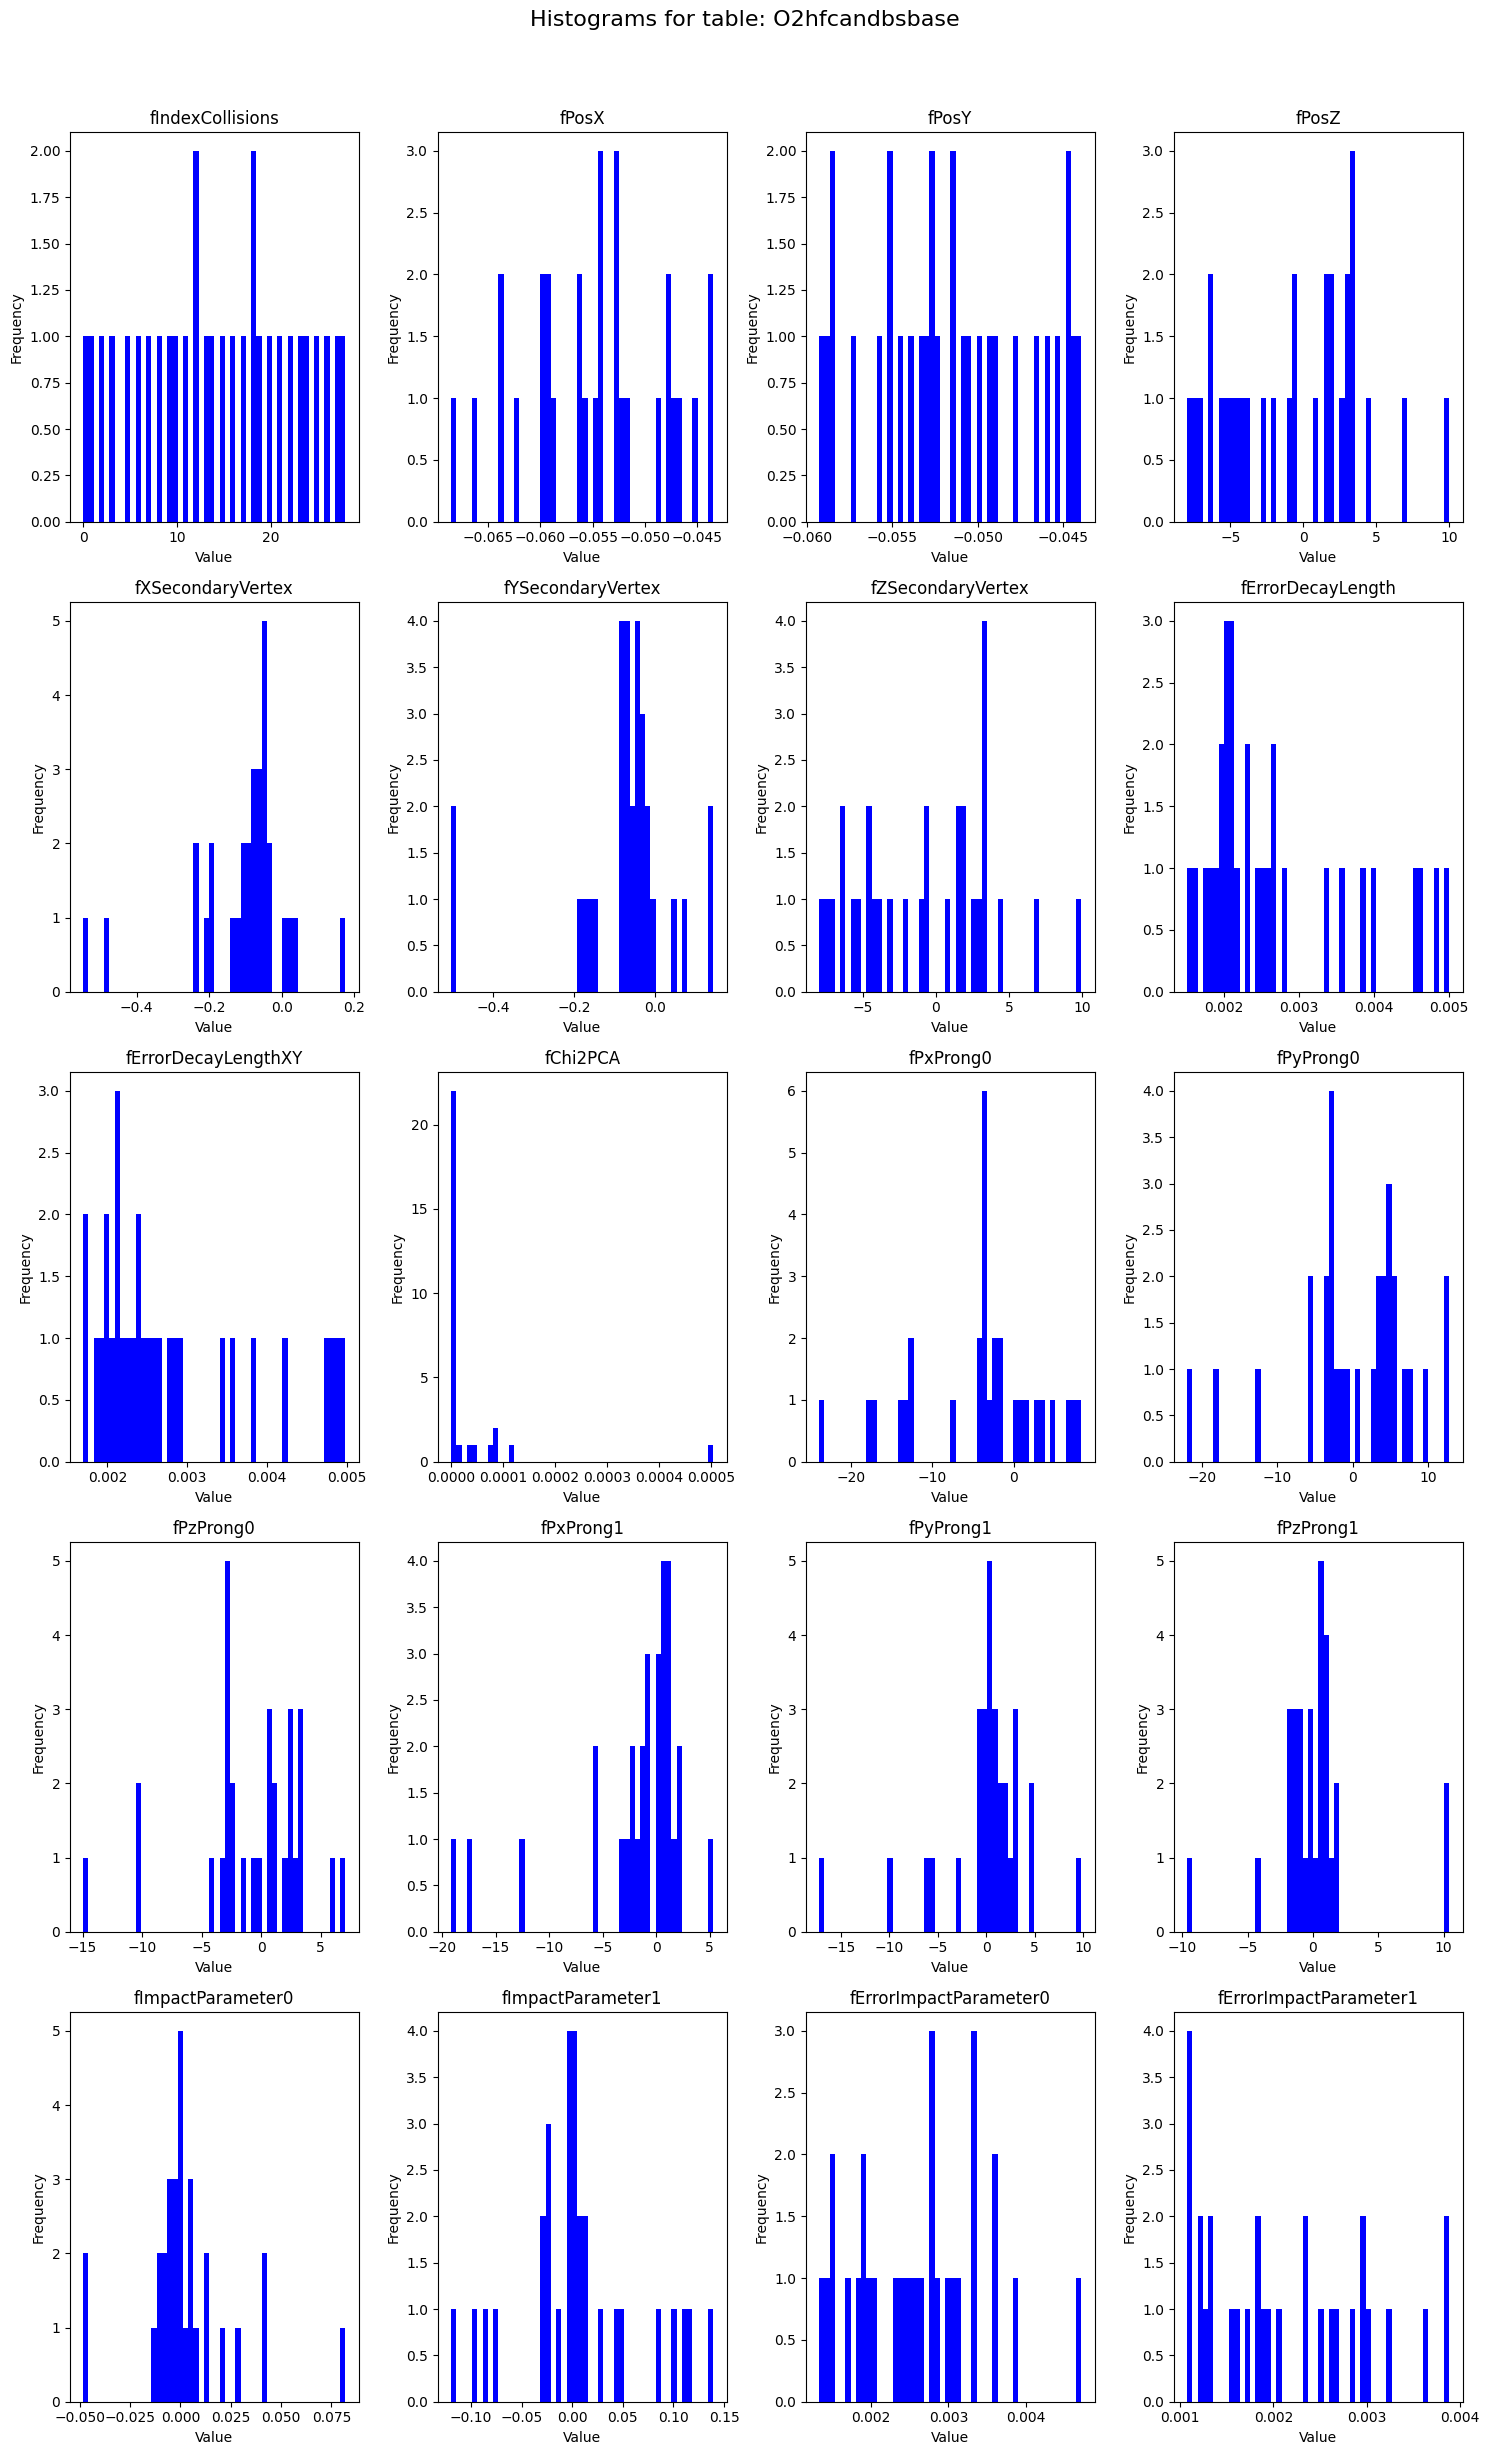

Reading DF_2387899194678550/O2hfredbsprong;1

Table: O2hfredbsprong
Number of entries: 30
Columns: ['fIndexHfRed3Prongs_0', 'fIndexHfRedTrackBases_1']
Plotting fIndexHfRed3Prongs_0
Plotting fIndexHfRedTrackBases_1


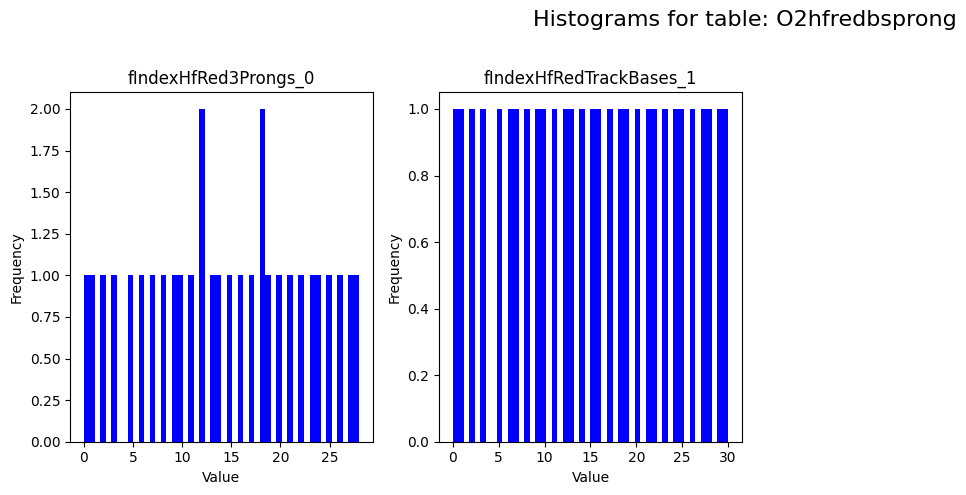

Reading DF_2387899194678550/O2hfredbsdsml;1

Table: O2hfredbsdsml
Number of entries: 0
Columns: ['fProng0MlScoreBkg', 'fProng0MlScorePrompt', 'fProng0MlScoreNonprompt']
Plotting fProng0MlScoreBkg
Plotting fProng0MlScorePrompt
Plotting fProng0MlScoreNonprompt


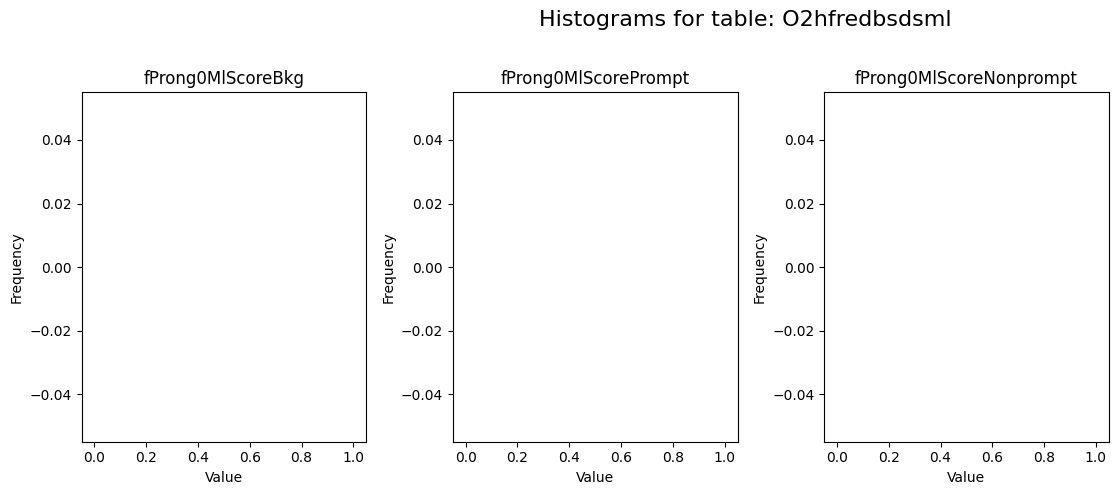

Reading DF_2387899194678550/O2hfselbs;1

Table: O2hfselbs
Number of entries: 30
Columns: ['fIsSelBsToDsPi']
Plotting fIsSelBsToDsPi


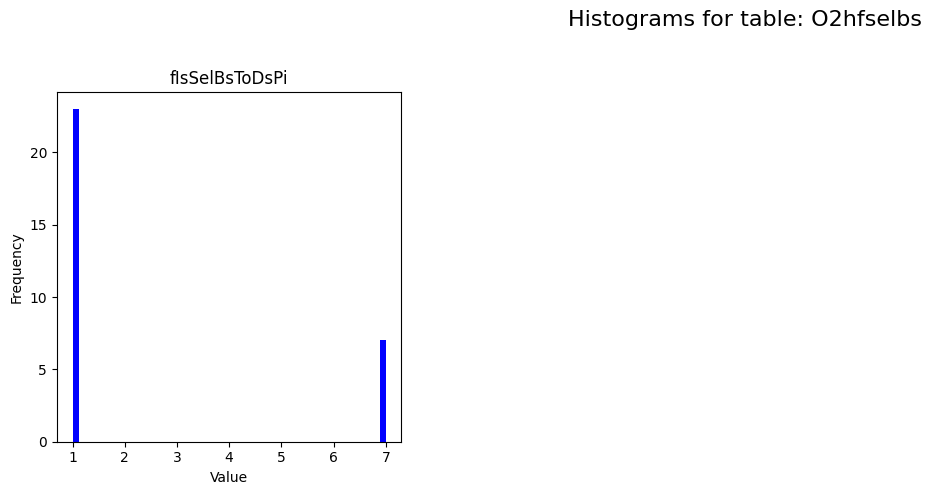

Reading DF_2387899194678550/O2hfredcandbslite;1

Table: O2hfredcandbslite
Number of entries: 30
Columns: ['fM', 'fPt', 'fEta', 'fPhi', 'fY', 'fCpa', 'fCpaXY', 'fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised', 'fDecayLengthXYNormalised', 'fImpactParameterProduct', 'fMaxNormalisedDeltaIP', 'fMlScoreSig', 'fIsSelBsToDsPi', 'fMProng0', 'fPtProng0', 'fDecayLength0', 'fDecayLengthXY0', 'fImpactParameter0', 'fPtDmesProngMin', 'fAbsEtaDmesProngMin', 'fItsNClsDmesProngMin', 'fTpcNClsCrossedRowsDmesProngMin', 'fTpcChi2NClDmesProngMax', 'fNSigTpcPiDmesProng0', 'fNSigTofPiDmesProng0', 'fNSigTpcTofPiDmesProng0', 'fNSigTpcKaDmesProng1', 'fNSigTofKaDmesProng1', 'fNSigTpcTofKaDmesProng1', 'fNSigTpcPiDmesProng2', 'fNSigTofPiDmesProng2', 'fNSigTpcTofPiDmesProng2', 'fProng0MlScoreBkg', 'fProng0MlScorePrompt', 'fProng0MlScoreNonprompt', 'fPtProng1', 'fAbsEtaProng1', 'fItsNClsProng1', 'fTpcNClsCrossedRowsProng1', 'fTpcChi2NClProng1', 'fImpactParameterProng1', 'fNSigTpcPiProng1', 'fNSi

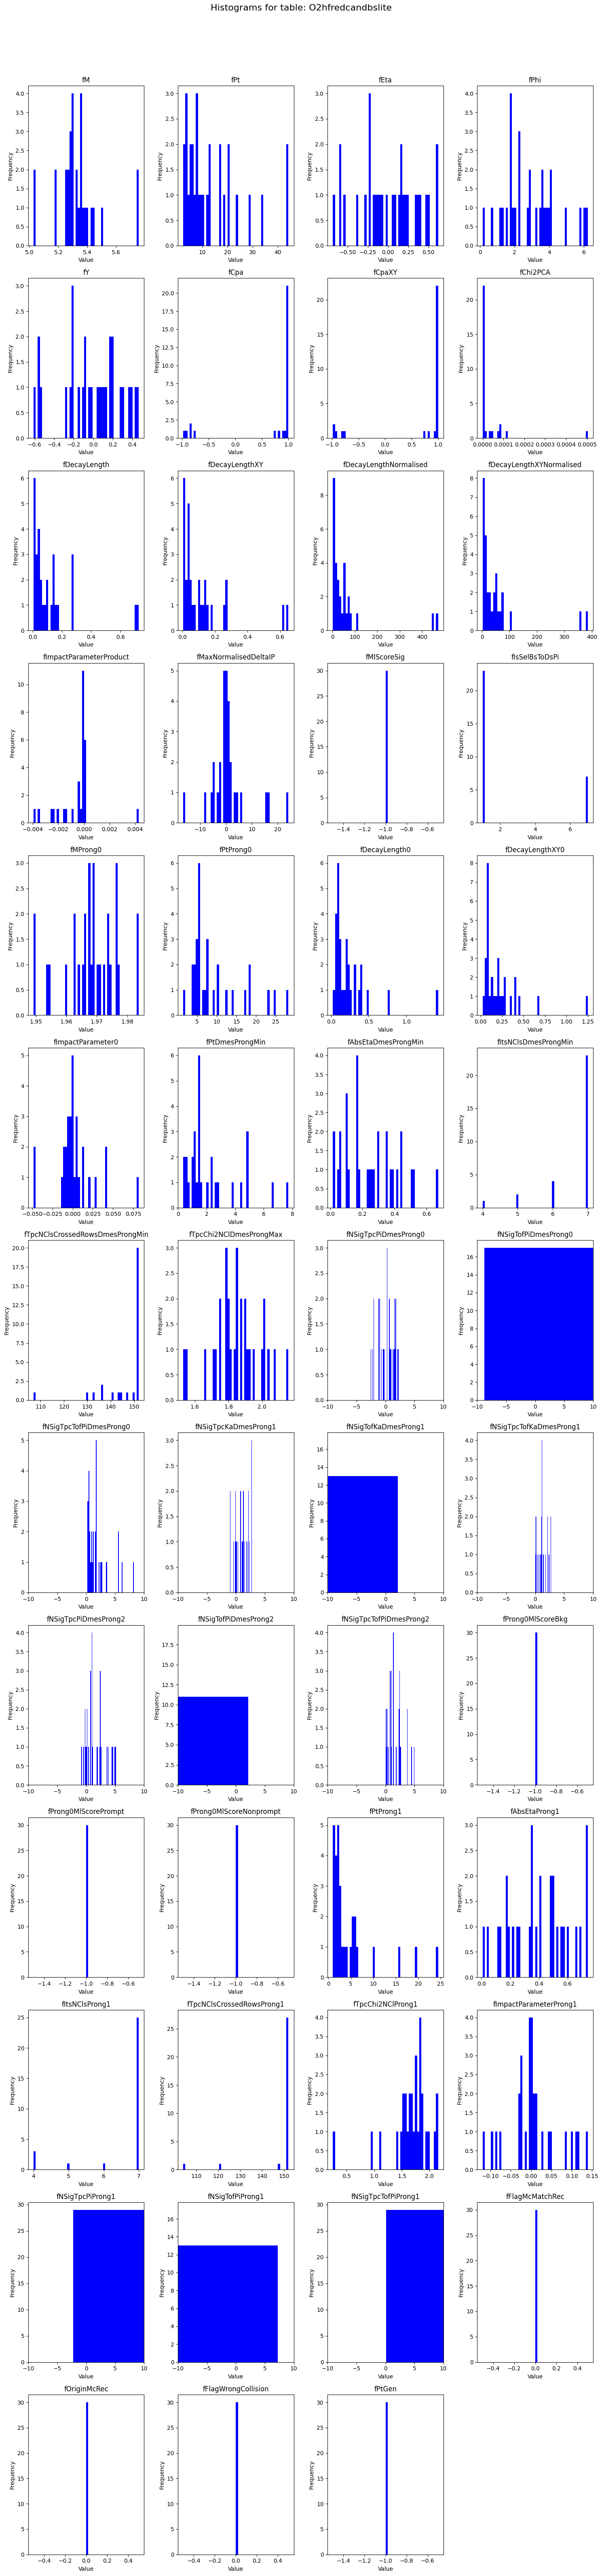

In [ ]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

tables = [
    "O2hfcandbsbase",
    "O2hfredbsprong",
    "O2hfredbsdsml",
    "O2hfselbs",
    "O2hfredcandbslite",
    # "O2hfredb0mccheck",
]

with uproot.open("Tree.root") as f:
    keys = f.keys()
    print("ROOT Keys:", keys)
    
    for table in tables:
        # Filter keys that match the table name
        matched_keys = [key for key in keys if f"{table};" in key]
        
        if not matched_keys:
            print(f"No keys found for table: {table}")
            continue
        
        dfs = []
        for key in matched_keys:
            print(f"Reading {key}")
            df = f[key].arrays(library="pd")
            dfs.append(df)
        
        full_df = pd.concat(dfs, ignore_index=True)
        print(f"\nTable: {table}")
        print(f"Number of entries: {len(full_df)}")
        print(f"Columns: {full_df.columns.tolist()}")
        
        # Plotting
        n_columns = len(full_df.columns)
        n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)
        
        fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
        axes = axes.flatten()

        for i, column in enumerate(full_df.columns):
            print(f"Plotting {column}")
            try:
                axes[i].hist(full_df[column].dropna(), bins=50, color='blue')
                axes[i].set_title(f'{column}')
                axes[i].set_xlabel('Value')
                axes[i].set_ylabel('Frequency')
                if "NSig" in column:
                    axes[i].set_xlim(-10, 10)  # Adjust limits for Nsigma columns
                    print(f"First 10 values for {column}:")
                    print(full_df[column].dropna()[0:10])  # Print first 10 values for Nsigma columns
            except Exception as e:
                print(f"Could not plot column {column}: {e}")
                axes[i].set_visible(False)
        
        # Remove unused axes if any
        for i in range(n_columns, len(axes)):
            fig.delaxes(axes[i])
        
        fig.suptitle(f"Histograms for table: {table}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
